# Анализ бизнес-показателей

Перед нами данные о приложении Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,

- выгрузка их покупок за этот период,

- рекламные расходы.

**Цели исследования:**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов

**Ход исследования**

Данные о файле я получу из файлов: visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

О качестве данных пока ничего не известно, поэтому перед тем, как приступать к целям, понадобится обзор данных
Я проверю данные на ошибки и оценю их влияние на исследование.
На этапе переработки и поищу возможность исправить ошибки, если они были, чтобы они не повлияли на конечный результат.
Далее, создам графики и сводные таблицы для проведения исследовательского анализа.

Таким образом, будут следующие этапы:
- Обзор данных
- Переработка данных
- Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- Исследовательский анализ данных
- Анализ маркетинга
- Оценка окупаемости рекламы
- Написание вывода по проекту


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import warnings

Имортируем все необходимые библиотеки 

In [3]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits = visits.rename(columns={'User Id': 'user_id','Region': 'region','Device': 'device','Channel': 'channel','Session Start': 'session_start','Session End': 'session_end',})
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])
visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:36:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:46:31
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 14:09:25
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:29:59
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:33:35
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 13:28:12
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:14:52
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:40:48
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:34


In [4]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders = orders.rename(columns={'User Id': 'user_id','Event Dt': 'event_dt','Revenue': 'revenue'})
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs = costs.rename(columns={'Channel': 'channel'})
costs['dt'] = pd.to_datetime(costs['dt'])
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Поменяли название столбцов на синтаксически правильные и перевели столбцы с датами в формат дататайм

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Проверили общую информацию о столбцах в каждой таблице

In [9]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [10]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [11]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Поискали пропуски в данных

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

In [15]:
costs[['dt','channel']].duplicated().sum()

0

In [16]:
orders[['user_id','event_dt']].duplicated().sum()

0

In [17]:
visits[['user_id','session_start','session_end']].duplicated().sum()

0

Сделали проверку на явные и неявные дубликаты. 

*Выводы*

Произвели замену типа данных в столбцах с датой во всех трех таблицах на datetime.
Пропусков, а так же явных и неявных дубликатов в данных при анализе обнаружено не было.


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [18]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['dt'] = profiles['dt'].astype('datetime64')
    
    

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [54]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [181]:
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,90016,0.427146,0.518896,0.588874,0.64659,0.697887,0.741496,0.782269,0.818805,0.854446,0.887688,0.918389,0.946085,0.973286,0.998078


In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 




In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Были составлены функции для расчета всех необходимых метрик. 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

*Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.*


In [26]:
profiles = get_profiles(visits,orders,costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [27]:
max_date = profiles['dt'].max()
min_date = profiles['dt'].min()
print(min_date)
print(max_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


В условиях указано, что наблюдаемая дата 1 ноября 2019 года, а период анализа 14 дней. Судя по данным, мы попадаем в двухнедельный интервал.

*Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.*

In [28]:
profiles_sorted_region = profiles.groupby('region').agg({'user_id': 'count','payer':'sum'}).sort_values(by = 'user_id',ascending=False).reset_index()
profiles_sorted_region['perc_of_buyers'] = (profiles_sorted_region['payer'] / profiles_sorted_region['user_id'])*100
profiles_sorted_region

,region,user_id,payer,perc_of_buyers
0,United States,100002,6902,6.901862
1,UK,17575,700,3.982930
2,France,17450,663,3.799427
3,Germany,14981,616,4.111875


<Figure size 1080x360 with 0 Axes>

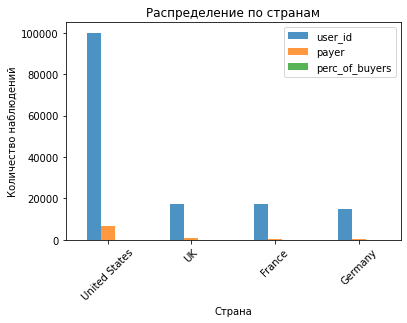

In [29]:
plt.figure(figsize=(15, 5))
profiles_sorted_region.plot(x='region',kind='bar',alpha=0.8, title = 'Распределение по странам');
plt.ylabel('Количество наблюдений')
plt.xlabel('Страна')
plt.xticks(rotation=45)
plt.show()

*Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.*

In [30]:
profiles_sorted_device = profiles.groupby('device').agg({'user_id': 'count','payer':'sum'}).sort_values(by = 'user_id',ascending=False).reset_index()
profiles_sorted_device 

,device,user_id,payer
0,iPhone,54479,3382
1,Android,35032,2050
2,PC,30455,1537
3,Mac,30042,1912


<Figure size 1080x360 with 0 Axes>

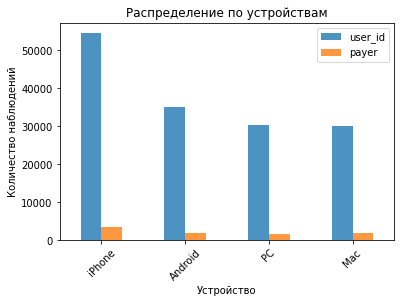

In [31]:
plt.figure(figsize=(15, 5))
profiles_sorted_device.plot(x='device',kind='bar',alpha=0.8, title = 'Распределение по устройствам');
plt.ylabel('Количество наблюдений')
plt.xlabel('Устройство')
plt.xticks(rotation=45)
plt.show()

*Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.*

In [32]:
profiles_sorted_channel = profiles.groupby('channel').agg({'user_id': 'count','payer':'sum'}).sort_values(by = 'payer',ascending=False).reset_index()
profiles_sorted_channel 

,channel,user_id,payer
0,FaceBoom,29144,3557
1,TipTop,19561,1878
2,organic,56439,1160
3,WahooNetBanner,8553,453
4,AdNonSense,3880,440
5,RocketSuperAds,4448,352
6,LeapBob,8553,262
7,OppleCreativeMedia,8605,233
8,lambdaMediaAds,2149,225
9,YRabbit,4312,165


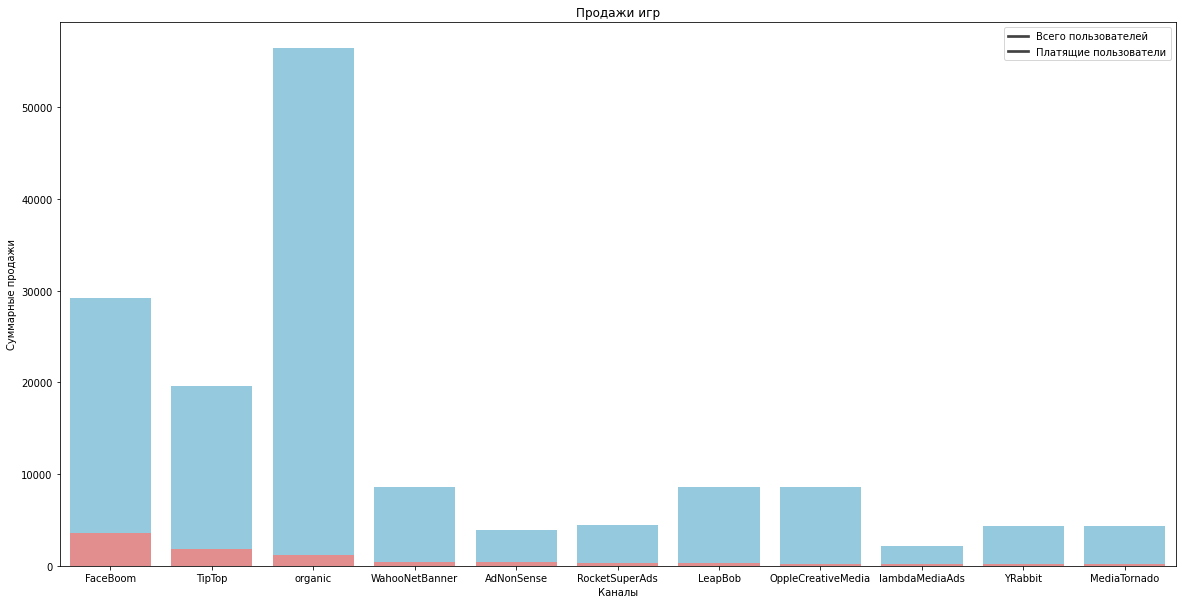

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(x='channel', y='user_id', color='skyblue', data=profiles_sorted_channel)
sns.barplot(x='channel', y='payer', color='lightcoral', data=profiles_sorted_channel)
plt.title('Продажи игр')
plt.xlabel('Каналы')
plt.ylabel('Суммарные продажи')
plt.legend(labels=['Всего пользователей', 'Платящие пользователи'])
plt.show()

*Выводы*

- Самым прибыльным регионом для компании оказался регион United State. В нем находится как большинство зарегестрированных участников, так и доля платящих клиентов, а именно 100002 регистраций и 6902 транзакций. 

- Самым прибыльным устройством является iPhone. С него больше всего пользователей,54479, а так же больше всего платящих - 3382. На втором месте идет Android с 35032 зарегестрировавшимися и 2050 платящими.

- Лидеры среди каналов привления это organic с 56439, и FaceBoom с 	29144 пользователями. На третьем месте находится TipTop с 19561. А вот по платящим пользователям картина другая. В лидерах FaceBoom	 с 3557 платящими пользователями, на втором месте TipTop с 1878, а замыкает тройку лидеров organic с 1160 оплативших.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

*Посчитайте общую сумму расходов на маркетинг.*

In [34]:
profiles['acquisition_cost'].sum().round(1)

105497.3

Найдена общая сумма, что была потрачена на маркетинг.

*Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.*

In [35]:
profiles_sorted_channel_cost = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by = 'acquisition_cost', ascending=False).reset_index()
profiles_sorted_channel_cost

,channel,acquisition_cost
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


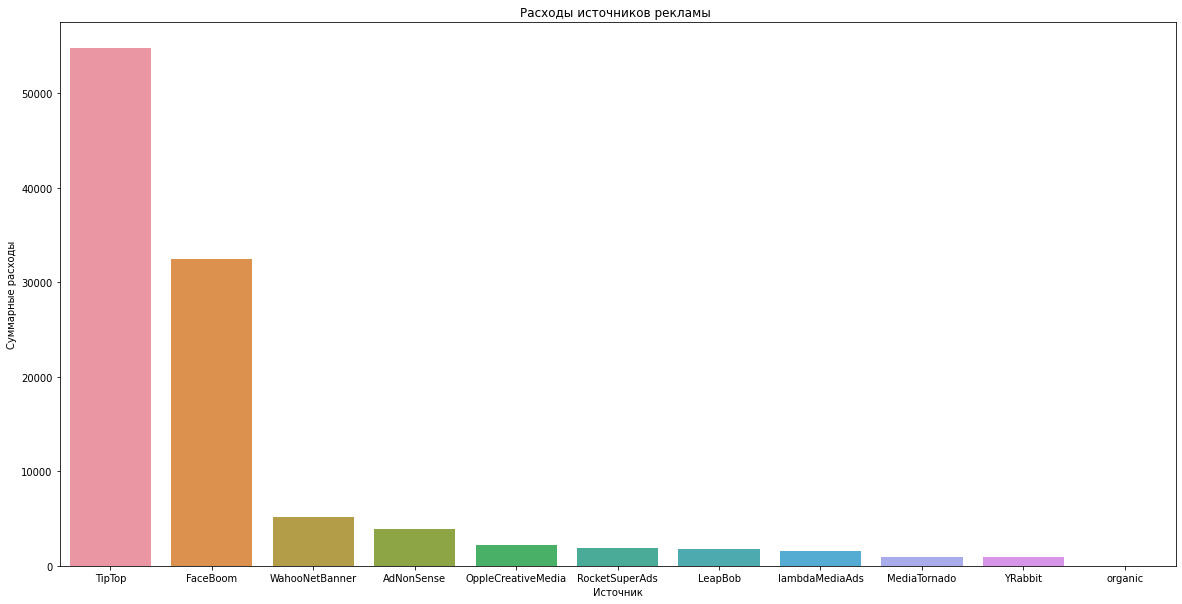

In [36]:
plt.figure(figsize=(20, 10))
sns.barplot(x='channel', y='acquisition_cost',data=profiles_sorted_channel_cost)
plt.title('Расходы источников рекламы ')
plt.xlabel('Источник')
plt.ylabel('Суммарные расходы')
plt.show()

В лидерах по тратам на рекламу находятся два источника, а именно TipTop	с 54751.30 долларов и FaceBoom	с 32445.60. Остальные значиетлно отстают от топа.

*Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.*

In [37]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [38]:
weekly_costs = profiles.groupby(['channel', profiles['dt'].dt.week]).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost').reset_index()
warnings.filterwarnings('ignore')
weekly_costs = weekly_costs.rename(columns={'dt': 'week'})
weekly_costs

/tmp/ipykernel_154/2253490573.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_costs = profiles.groupby(['channel', profiles['dt'].dt.week]).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost').reset_index()


,channel,week,acquisition_cost
0,organic,43,0.0
1,organic,18,0.0
2,organic,19,0.0
3,organic,20,0.0
4,organic,21,0.0
...,...,...,...
281,TipTop,41,3097.5
282,TipTop,38,3241.0
283,TipTop,43,3265.5
284,TipTop,40,3703.0


Сделали таблицу с понедельными тратами на разные источники.

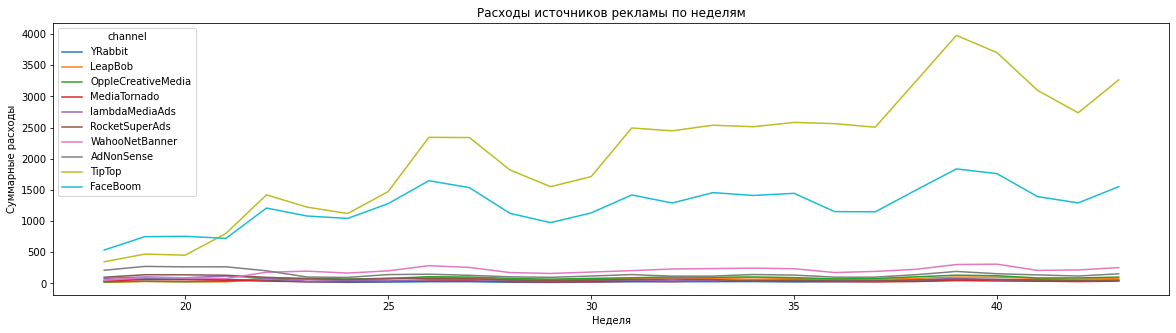

In [39]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='week', y='acquisition_cost', hue='channel', data=weekly_costs.query("channel != 'organic'"))
plt.title('Расходы источников рекламы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Суммарные расходы')
plt.show()

In [40]:
monthly_costs = profiles.groupby(['channel', profiles['dt'].dt.month]).agg({'acquisition_cost':'sum'}).sort_values(by='dt').reset_index()
warnings.filterwarnings('ignore')
monthly_costs = monthly_costs.rename(columns={'dt': 'month'})
monthly_costs

,channel,month,acquisition_cost
0,AdNonSense,5,1169.70
1,OppleCreativeMedia,5,169.75
2,TipTop,5,2981.00
3,MediaTornado,5,238.56
4,WahooNetBanner,5,418.80
...,...,...,...
61,lambdaMediaAds,10,213.60
62,MediaTornado,10,140.16
63,OppleCreativeMedia,10,378.00
64,FaceBoom,10,5736.50


Сделали таблицу с помесячными тратами на разные источники.

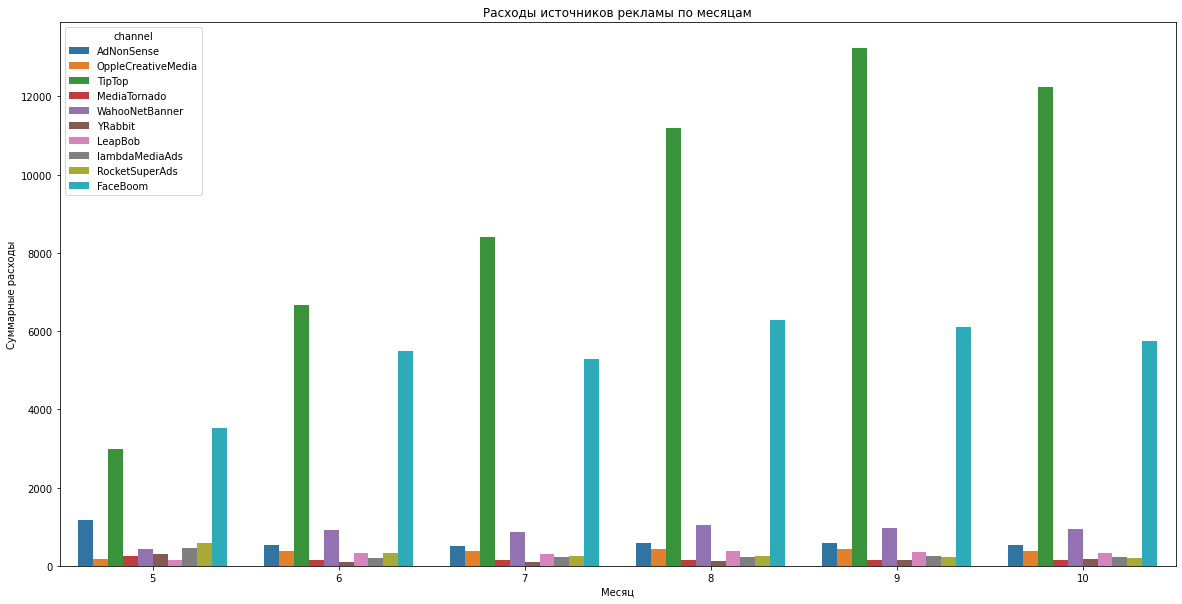

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(x='month', y='acquisition_cost', hue='channel', data=monthly_costs.query("channel != 'organic'"))
plt.title('Расходы источников рекламы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные расходы')
plt.show()

Судя по графику недельных трат на рекламу, самые растратные были TipTop и FaceBoom. На 18, 19 и 20 недели лидировал по расходам FaceBoom, а начиная же с 21 недели TipTop набрал обороты и в последствии обошел FaceBoom на всем оставшемся пути наблюдения.
С 18 по 21 неделю другие источники отставали от лидеров несильно, тогда как в дальнейшем все другие варианты, кроме TipTop и FaceBoom, практически не несли расходов.
Преобладание расходов было замечено с 38 по 41 неделю, с пиком на 39 неделе. Там траты через источник TipTop достигли практически 3800 долларов.

Как видно из графиков, самыми растратными на рекламу источниками по месяцам были все те же TipTop и FaceBoom. Суммарные траты в месяц на них были крайне высоки по сравнению в другими источниками рекламы на всем этапе наблюдения. 
Пик расходов был в 9 месяце и составлял 13000 долларов для источника TipTop. 

*Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.*

In [51]:
profiles_sorted_channel_cost_mean = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by = 'acquisition_cost',ascending=False).reset_index()
profiles_sorted_channel_cost_mean.round(3)

,channel,acquisition_cost
0,TipTop,2.799
1,FaceBoom,1.113
2,AdNonSense,1.008
3,lambdaMediaAds,0.725
4,WahooNetBanner,0.602
5,RocketSuperAds,0.412
6,OppleCreativeMedia,0.250
7,YRabbit,0.219
8,MediaTornado,0.219
9,LeapBob,0.210


Самым растратным по средней цене на одного пользователя оказался TipTop с ценой за 1 человека порядка 2.3 доллара. Следом идет FaceBoom	с 1.113 за человека, а дальше AdNonSense с 1.008.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

*Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI*

In [43]:
def get_profiles_without_organic(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.query('channel != "organic"').sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['dt'] = profiles['dt'].astype('datetime64')
    
    

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [44]:
profiles_without_organic = get_profiles_without_organic(visits, orders, costs)
profiles_without_organic

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.076596
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.092857
2,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
3,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.214286
4,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
95043,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.832143
95044,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.111828
95045,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.441989
95046,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [45]:
observation_date = datetime(2019,11,1)
analysis_horizon = 14

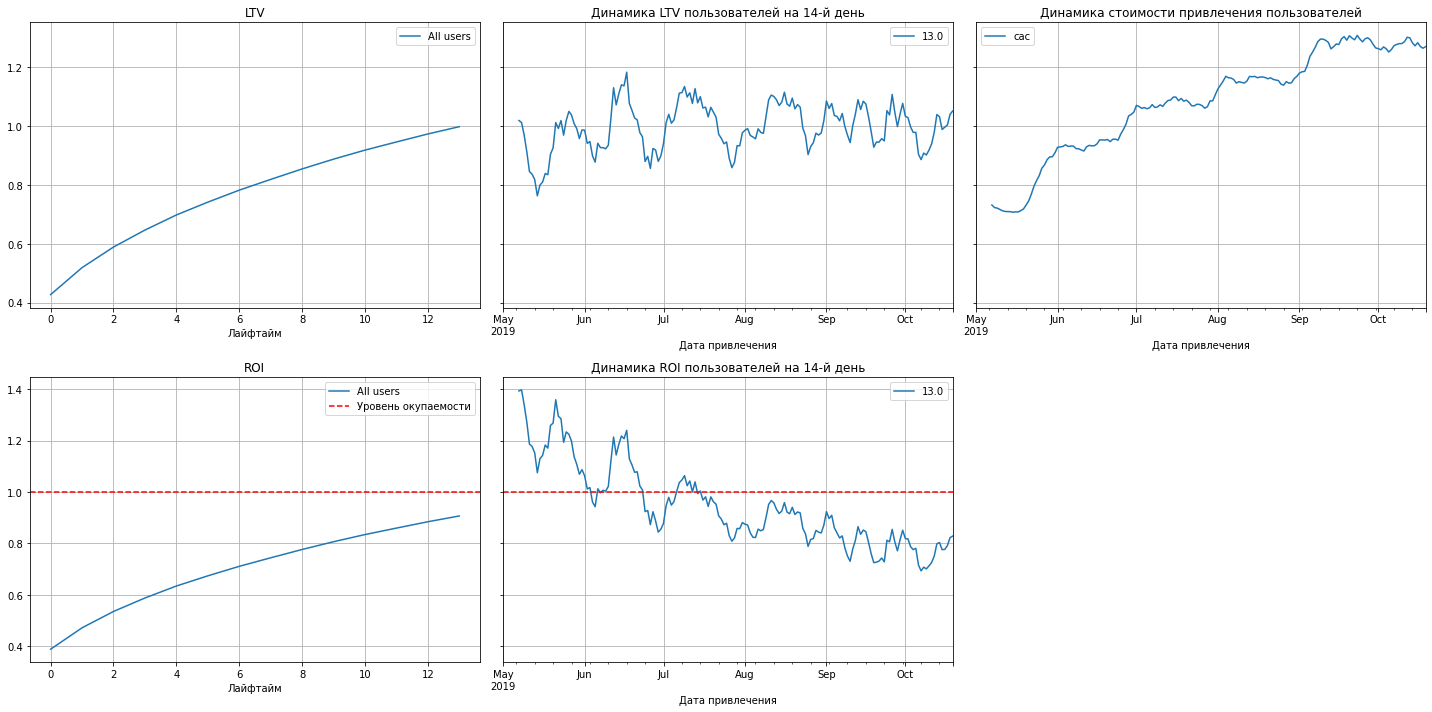

In [48]:
ltv_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_without_organic, orders, observation_date, analysis_horizon)
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, 14) 

Реклама не окупается. Хотя, ROI в конце лайфтайма практически достигает 90 процентов.
CAC со временем растет. Рекламный бюджет стабильно увеличивается.
LTV показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Посчитаем среднее LTV на одного пользователя из каждой когорты, а так же среднее LTV для каждой когорты.

In [90]:
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3801,0.704604,0.787845,0.848237,0.895501,0.924646,0.949861,0.978742,0.993183,1.018135,1.032576,1.040716,1.051218,1.066972,1.078795
FaceBoom,27759,0.613633,0.689251,0.729019,0.757281,0.776519,0.790362,0.805139,0.815460,0.824126,0.832972,0.838941,0.846131,0.851707,0.856201
LeapBob,8194,0.162132,0.212072,0.261400,0.292094,0.316698,0.346539,0.373456,0.395504,0.433284,0.458861,0.483222,0.504537,0.524025,0.541076
MediaTornado,4314,0.377601,0.433357,0.496052,0.544655,0.584235,0.624722,0.646699,0.677932,0.702228,0.729064,0.762610,0.789214,0.810035,0.822068
OppleCreativeMedia,8232,0.153731,0.188287,0.227942,0.264922,0.299000,0.325672,0.349920,0.370288,0.389696,0.408489,0.426189,0.439040,0.459055,0.473603
RocketSuperAds,4411,0.453695,0.567524,0.653507,0.716858,0.777722,0.834511,0.905804,0.956713,1.008998,1.067384,1.113992,1.154720,1.192281,1.228481
TipTop,18717,0.398030,0.555193,0.683128,0.799334,0.902258,0.995314,1.073971,1.157109,1.231716,1.307067,1.372227,1.433761,1.490343,1.551025
WahooNetBanner,8167,0.248223,0.351022,0.438778,0.502936,0.575283,0.628565,0.692149,0.739196,0.785881,0.825598,0.873989,0.911016,0.951958,0.980798
YRabbit,4282,0.384390,0.437067,0.483681,0.535425,0.590220,0.621684,0.648487,0.674127,0.695103,0.716079,0.739386,0.766193,0.793230,0.809545


In [89]:
result_grouped_mean = result_grouped.groupby('cohort_size').mean().reset_index()
result_grouped_mean['ltv_mean_for_cohort'] = result_grouped_mean.drop('cohort_size', axis=1).mean(axis=1)
result_grouped_mean = result_grouped_mean[['cohort_size', 'ltv_mean_for_cohort']]
result_grouped_mean['ltv_mean_per_customer'] = result_grouped_mean['ltv_mean_for_cohort'] / result_grouped_mean['cohort_size']
result_grouped_mean.sort_values(by = 'ltv_mean_for_cohort')

,cohort_size,ltv_mean_for_cohort,ltv_mean_per_customer
7,8232,0.341131,0.000041
6,8194,0.378922,0.000046
2,4282,0.635330,0.000148
3,4314,0.642891,0.000149
5,8167,0.678957,0.000083
9,27759,0.787624,0.000028
4,4411,0.902299,0.000205
1,3801,0.955074,0.000251
8,18717,1.067891,0.000057
0,2139,1.415067,0.000662


На графике по размерам когорт видно, что самыми окупаемыми оказались когороты со средней LTV в 1.06 и 1.41. Остальные начинаются с 0.9 и ниже.

*Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.*

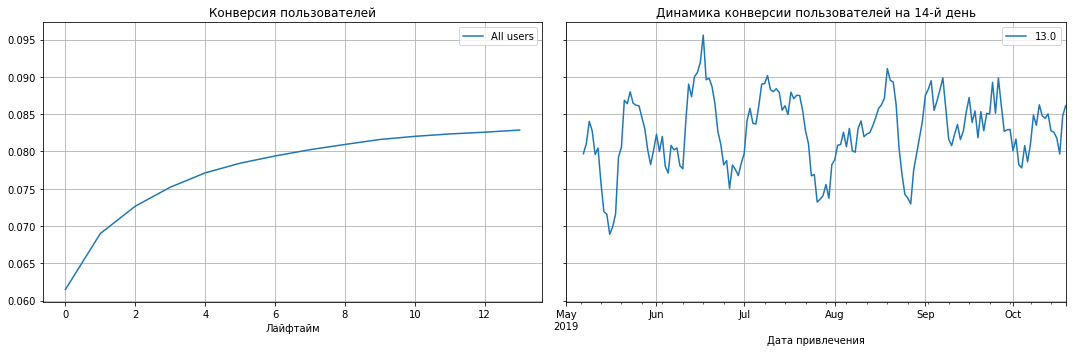

In [56]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, analysis_horizon)
plot_conversion(conversion, conversion_history, analysis_horizon)

Судя по графикам, пользователи конвертируются очень хорошо, причём постоянно. 

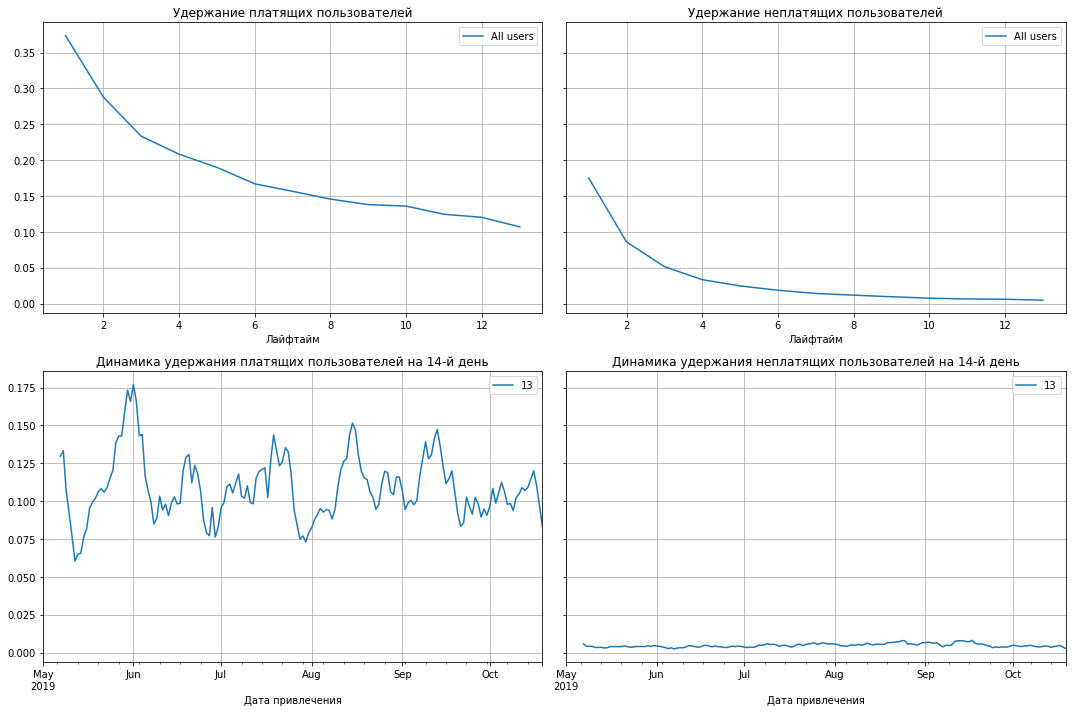

In [57]:
retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, analysis_horizon)
plot_retention(retention, retention_history, analysis_horizon) 

Судя по графикам, удержание платящих пользователей выше, чем удерждание неплатящих, как и должно быть. В своем пике удержание платящих равно 40 процентов, а в конце лайфтайма опускается до 13 процентов.

*Посчитаем удержание и конверсию в разбивки по странам, каналам и дивайсам*

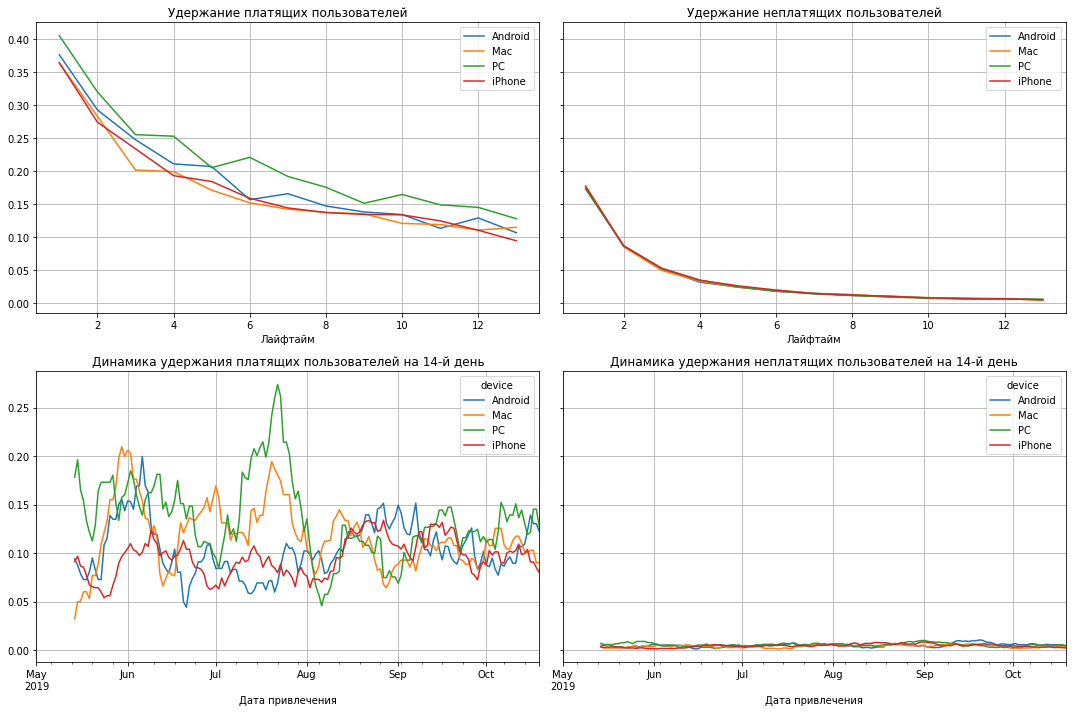

In [59]:
dimensions = ['device']
retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, analysis_horizon,dimensions=dimensions)
plot_retention(retention, retention_history, analysis_horizon,14) 

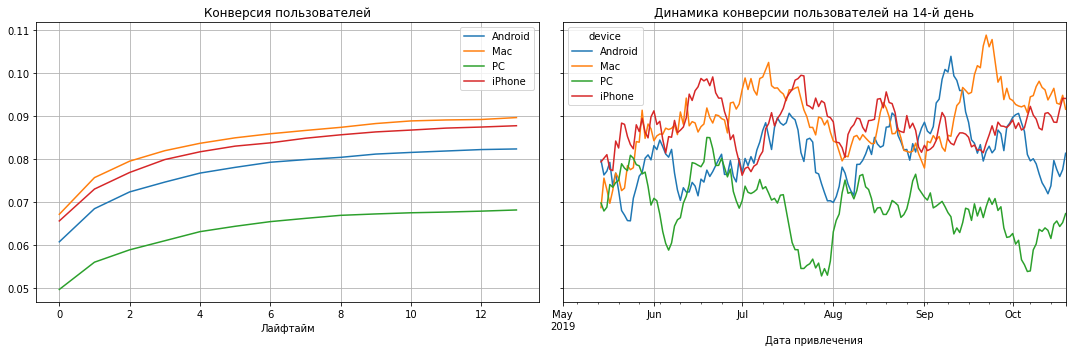

In [61]:
dimensions = ['device']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, analysis_horizon,dimensions=dimensions)
plot_conversion(conversion, conversion_history, analysis_horizon,14)

Можно сделать вывод, что самая высока конверсия идет у пользователей Mac и iPhone. PC находится в самом низу и проносит меньше всего прибыли. 

Удержание платящих пользователей лучше всего происходит на платформе PC. Остальные платформы имеют одинаковую картину удержания и на графике расположены ниже лидера.

Нужно изменить политику маркетинга для пользователей РС, повысить привлекательность предлагаемого продукта, что бы поднять конверсию.


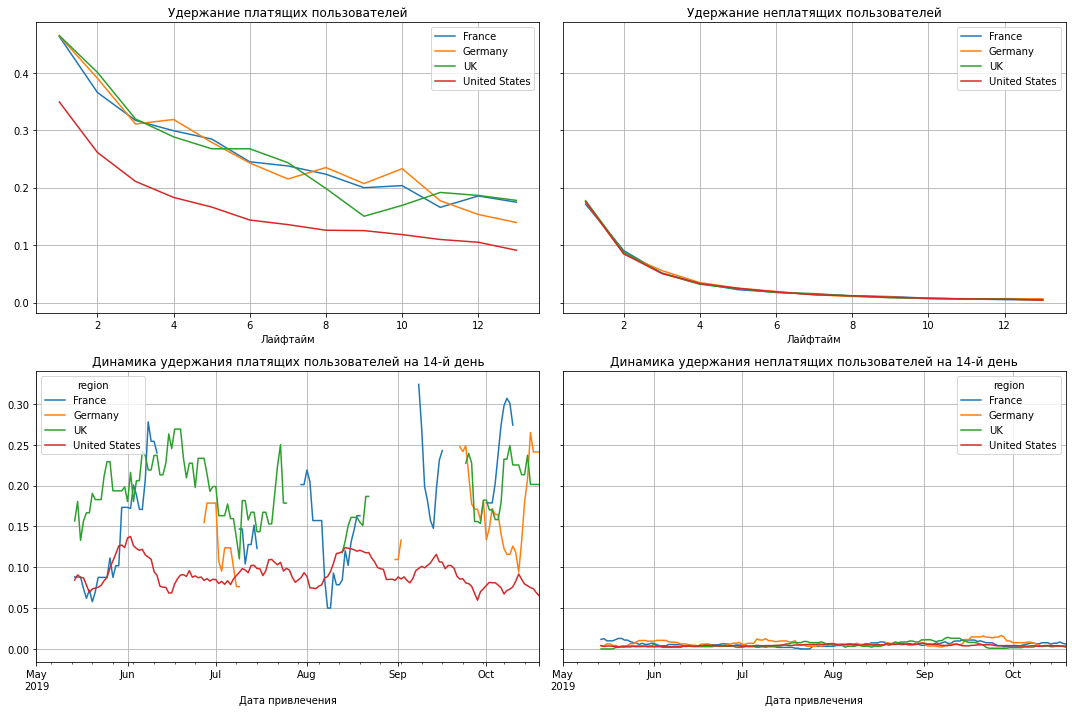

In [62]:
dimensions = ['region']
retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, analysis_horizon,dimensions=dimensions)
plot_retention(retention, retention_history, analysis_horizon,14) 

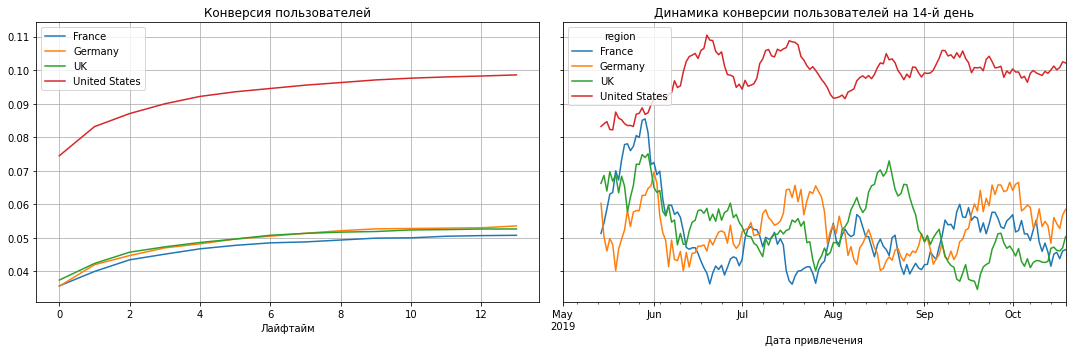

In [63]:
dimensions = ['region']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, analysis_horizon,dimensions=dimensions)
plot_conversion(conversion, conversion_history, analysis_horizon,14)

Судя по конверсии, в Европе конверсия пользоватлей находится на одном уровне, тогда как США значительно опережает эти страны по показателю конверии и находится в лидерах. Высокая конверсия в США может указывать на эффективность маркетинга или привлекательность предлагаемого продукта для американской аудитории.

А вот удрежание платящих пользователей же наоборот, выше в Европейских странах и ниже в США.
Низкая степень удержания в Америке может указывать на то, что клиенты быстро уходят после начальной сделки, возможно из-за конкуренции или других факторов. Следовательно, нужно повысить удержание, чтобы этот регион стал прибыльным для компании.

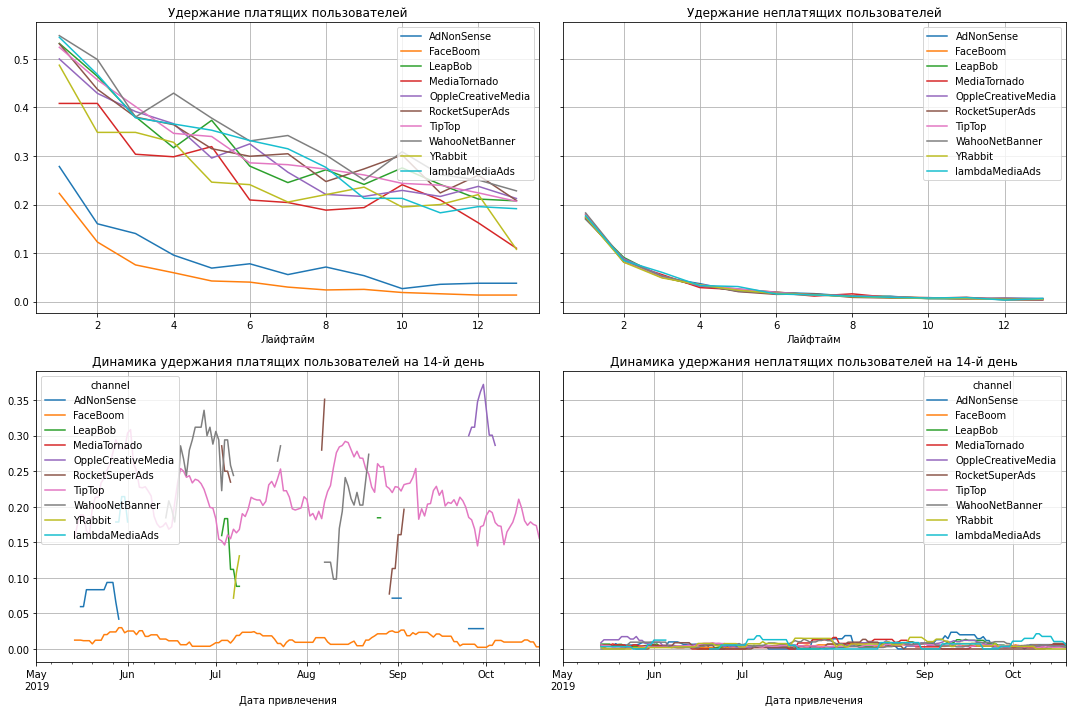

In [98]:
dimensions = ['channel']
retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, analysis_horizon,dimensions=dimensions)
plot_retention(retention, retention_history, analysis_horizon,14)

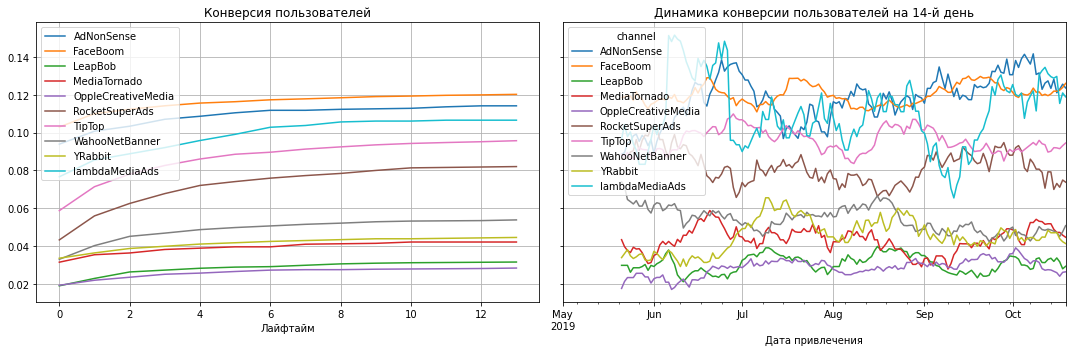

In [95]:
dimensions = ['channel']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, analysis_horizon,dimensions=dimensions)
plot_conversion(conversion, conversion_history, analysis_horizon,21)

Судя по разбивки по каналам,самаое низкое удержание платящих у пользователей из каналов FaceBoom и AdNonSense. Остальные каналы держутся примерно на одном уровене удержания.

Самая высокая конверсия у каналов АdNonSense и  FaceBoom. Из чего можно сделать вывод, что нужно поработать над удержанием пользователй этих каналов. Тогда, они будут стабильно и часть приносить высокий доход.

*Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.*

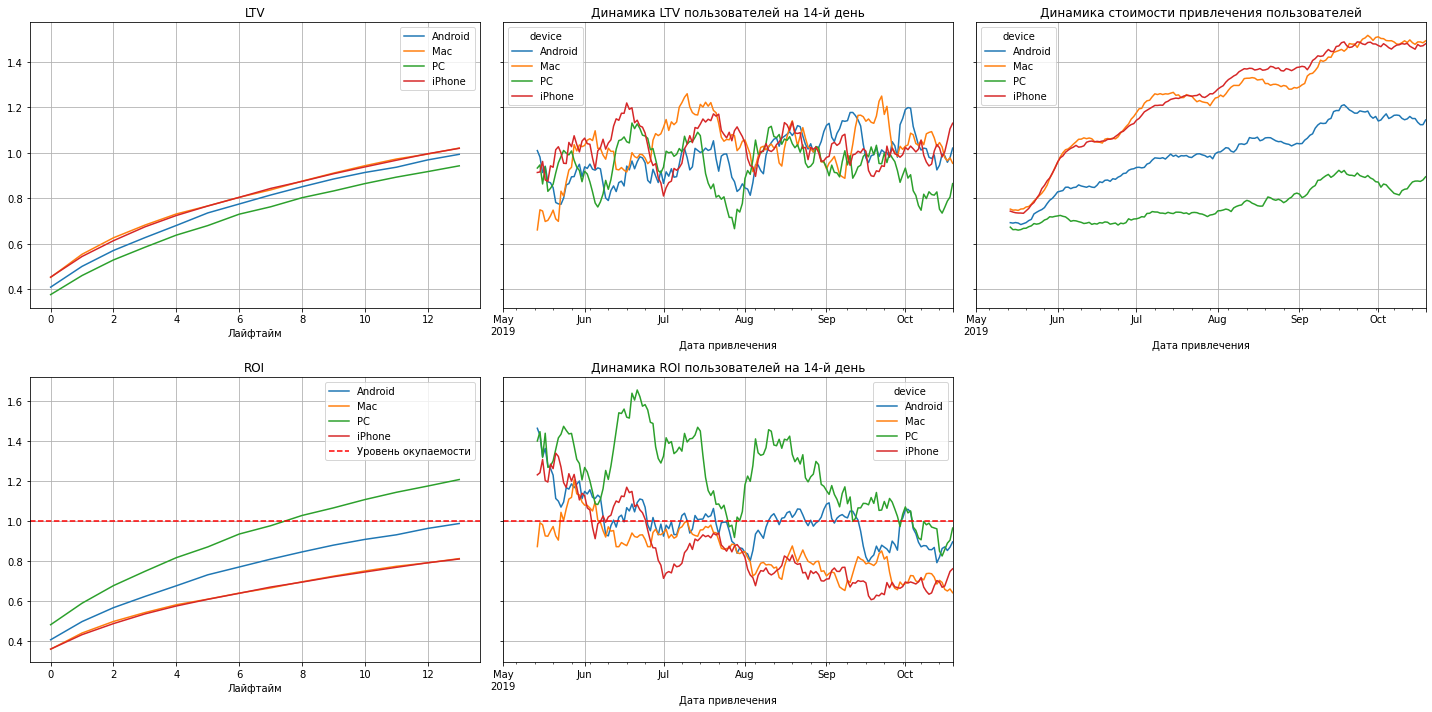

In [92]:
dimensions = ['device']
ltv_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions)

plot_ltv_roi(
    result_grouped, result_in_time, roi_grouped, roi_in_time, analysis_horizon, window=14) 

Пользователи PC окупаются, а вот пользователи Apple и Android нет.Android почти впритык подошел к границы окупаемости, но немого не дотягивает до нее. 
В динамике уже с июля пользователи яблочных устройств приносят компании только убытки. 
Так же и по графику CAC, затры на пользователей iPhone и Mac выше, чем затраты на пользователей PC и Android.

Можно сделать вывод, что пользователи PC стабильно окупаются, а пользователи других устройств нет.

*Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.*

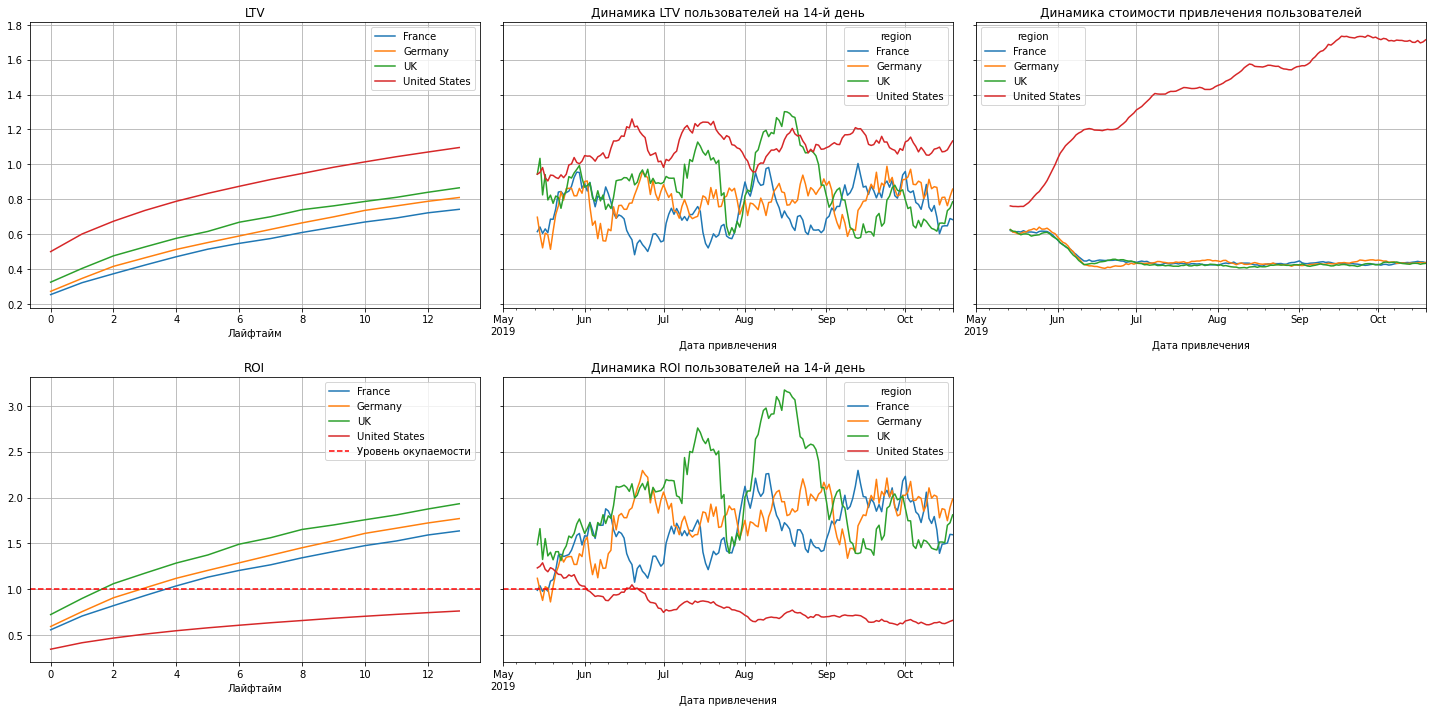

In [91]:
dimensions = ['region']
ltv_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions)

plot_ltv_roi(
    result_grouped, result_in_time, roi_grouped, roi_in_time, analysis_horizon, window=14) 

Судя по графику ROI, США единственная страна, которая не окупается по затратам на рекламу. Так же и динамике, уже с июля рекламная компания в США приносит только убытки. Другие же страны окупаются почти в двухкратном размере.
Так же, судя по CAC, если все другие страны имеют примерно равную стоймость привличения пользователей, то США значительно от них отрывается. Пиковое значения САС для пользователей США около 1.6 доллара, тогда как для других стран это около 0.3

В итоге, реклама в США себя не оправдывает, и нужно снижать расходы на рекламу в этом регионе.

*Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.*

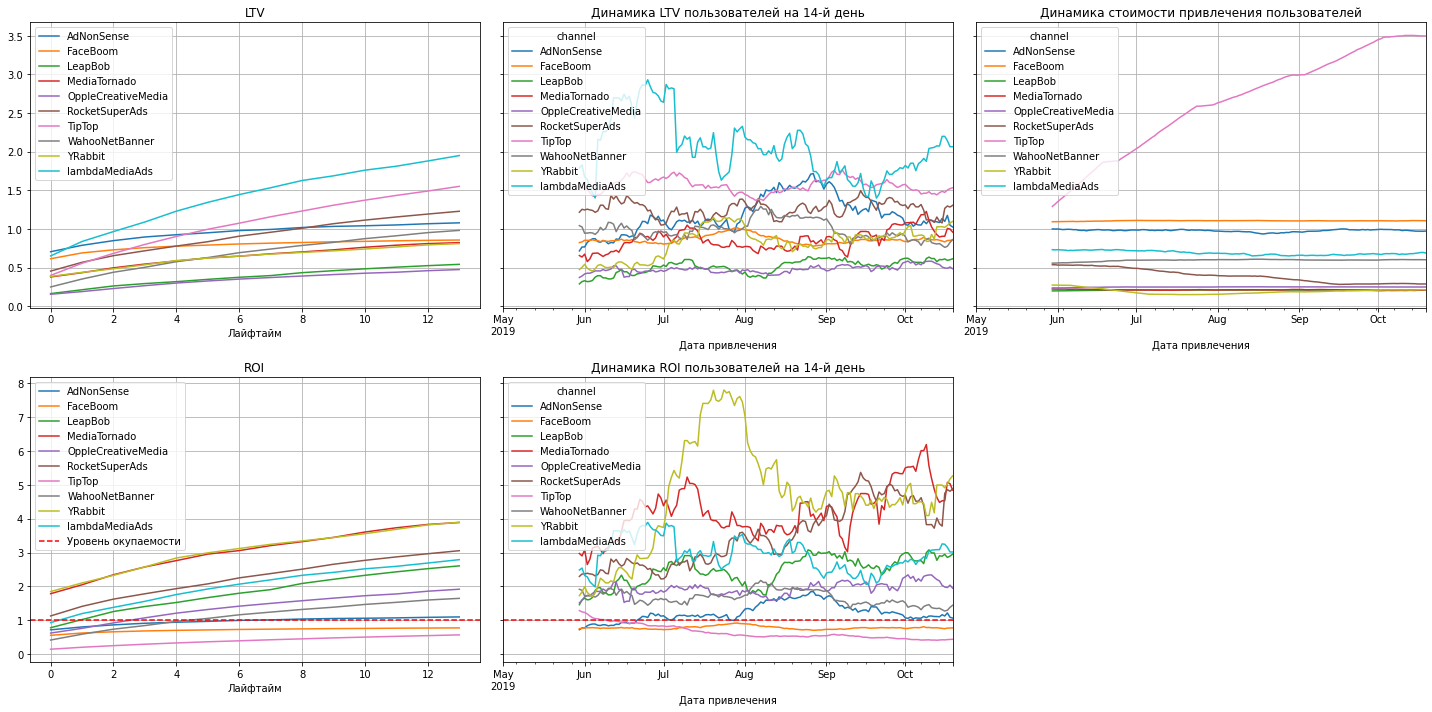

In [68]:
dimensions = ['channel']
ltv_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_without_organic, orders, observation_date, analysis_horizon, dimensions=dimensions)

plot_ltv_roi(
    result_grouped, result_in_time, roi_grouped, roi_in_time, analysis_horizon, window=30) 

Судя по графикам, из рекламных каналов окупается большая часть. Не окупается только каналы TipTop, FaceBoom. Едва едва окупается AdNonSense. 
Так же, все каналы в основном имеют одинаковую САС в диапазоне от 0.3 до 1.2 и по своей природе стабильны, тогда как канал TipTop постоянно увеличивается и достигает в пиковой форме значения 3.5.

В целом, каналы TipTop и FaceBoom себя не окупают. TipTop из за слишком высокой и растущей метрикой САС, а FaceBoom из за низкого удержания пользователей.

*Окупается ли реклама, направленная на привлечение пользователей в целом?*

В целом, рекламная компания не окупается. Она достигает 90 процентов, но до 100 не доходит.

*Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?*

Пользователи устройста РС единственные, кто себя окупает. Так же, рекламная компания в США, где преобладает количество пользователей яблочных устройст, так же не приносит выручку. Она находится сильно ниже линии окупаемости.

Каналы TipTop и FaceBoom  являются убыточными для фирмы. Какие то съедают много денег на привличения пользоватей, а какие то слабо удерживают пришедших пользователей.

*Чем могут быть вызваны проблемы окупаемости?*

На основании наблюдений можно предположить несколько возможных причин проблемы окупаемости рекламы:

1. Некачественные рекламные каналы: Каналы, которые не окупаются за за высокого САС, а так же низкого удержания.

2. Слабое удержание пользователей в стране с самым высоким показателем конверсии.

3. Для пользователей девайсов РС нужно улучшать конверию. Они единственные, кто окупает себя, плюс хорошо удерживаются, но мало покупают. Вероятно, имеет место быть какой то сбой при оплате на этой платформе. 



### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы**

Были сделаны следующие шаги:
1) Была проведена небольшая переработка данных

2) Заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.

3) Сделан исследовательский анализ данных

4) Проведен анализ маркетинга

5) Дана оценка окупаемости рекламы


Так же, удалось дать ответы на следующие вопросы:

- Откуда приходят пользователи и какими устройствами они пользуются?

Пользователи нашего приложения, это пользователи из Европы( Германия, Франция, Англия) и США. Устройства, с которых сидят пользователи, это PC, Mac, Android и iPhone.

- Cколько стоит привлечение пользователей из различных рекламных каналов?

Значения начинаются в диапазоне от 0.3 до 1.2 доллара, самые большие траты показывает канал TipTop с диапазоном 1.3 - 3.5 доллара.

- Сколько денег приносит каждый клиент?

Судя по таблице, в среднем каждый клиент в отдельности приносит не очень большие значения. Лучше посчитать среднее значение LTV для каждой когорты. Так, самыми окупаемыми оказались когороты со средней LTV в 1.06 и 1.41.

- Когда расходы на привлечение клиента окупаются?

При анализе по устройствам, расходы на привлечение клиента окупаются только для девайсов PC.
При анализе по странам, расходы окупаются в Европе. 
При анализе по рекламным каналам, окупаются все, кроме 2 самых затратных каналов, а именно TipTop и FaceBoom.

- Какие факторы мешают привлечению клиентов?

Каналы, которые не окупаются или имеют низкую окупаемость, а так же высокая стоимость привлечения CAC  в сравнении с ожидаемой прибылью LTV. Плюс, некоторые устройства, страны или регионы могут не приносить достаточной прибыли от привлечения пользователей, что снижает общую окупаемость рекламной кампании.

*Рекомендации*

В качестве рекомендаций отделу маркетинга можно посоветовать сосредоточить свое внимание на самых окупаемых рекламных каналах, которые имеют самое больше LTV, таких как LimbdaMediaArtsAds и TipTop. 

Так же, нужно постараться сокрасить цену в TipTop, так как хотя этот канал приносит много денег, но затраты на него так же велики, а значит нужно уменьшить САС, чтобы он стал окупать себя. 

Так же, для канала FaceBoom нужно увеличить удержание платящих пользователей, чтобы он стал приносить прибыль компании.
Тогда у нас все рекламные каналы будут приносить прибыль.

На РС конверсия пользователей самая низкая, но стоймость привлечения так же невысока, поэтому в итоге он себя окупает. А так как удержание для всех устройст примерно одинаковое, то для всех, кроме РС, нужно снижать САС.

Регион США имеет самую высокую конверию,а значит и прибыль, с большим отрывом от других стран. Но при этом самое низкое удержание, а так же очень высокий САС, что в итоге приводит к неокупамости региона. Он единственный, кто не окупает себя. Чтобы он стал себя окупать, нужно снизить САС, либо попробовать увеличить удержание платящих пользователей.
